In [5]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize
from ase.neighborlist import neighbor_list as nl
import matplotlib.pyplot as plt
import matplotlib.cm
from scipy import constants
from ase.io import read
import numpy as np
plt.style.use('/home/nwlundgren/spanners/matsci/miscellaneous/mpltstyle.txt')
prefix = '../silicene/plotdata/'
bluepalette=np.flip(np.array(['#040D12', '#183D3D', '#5C8374', '#93B1A6']))

Shapes
tau: (50000,) 		std: (50000, 2) 
mean: (50000, 2) 	kappas: (50000, 3, 10)


(0.0, 18.0)

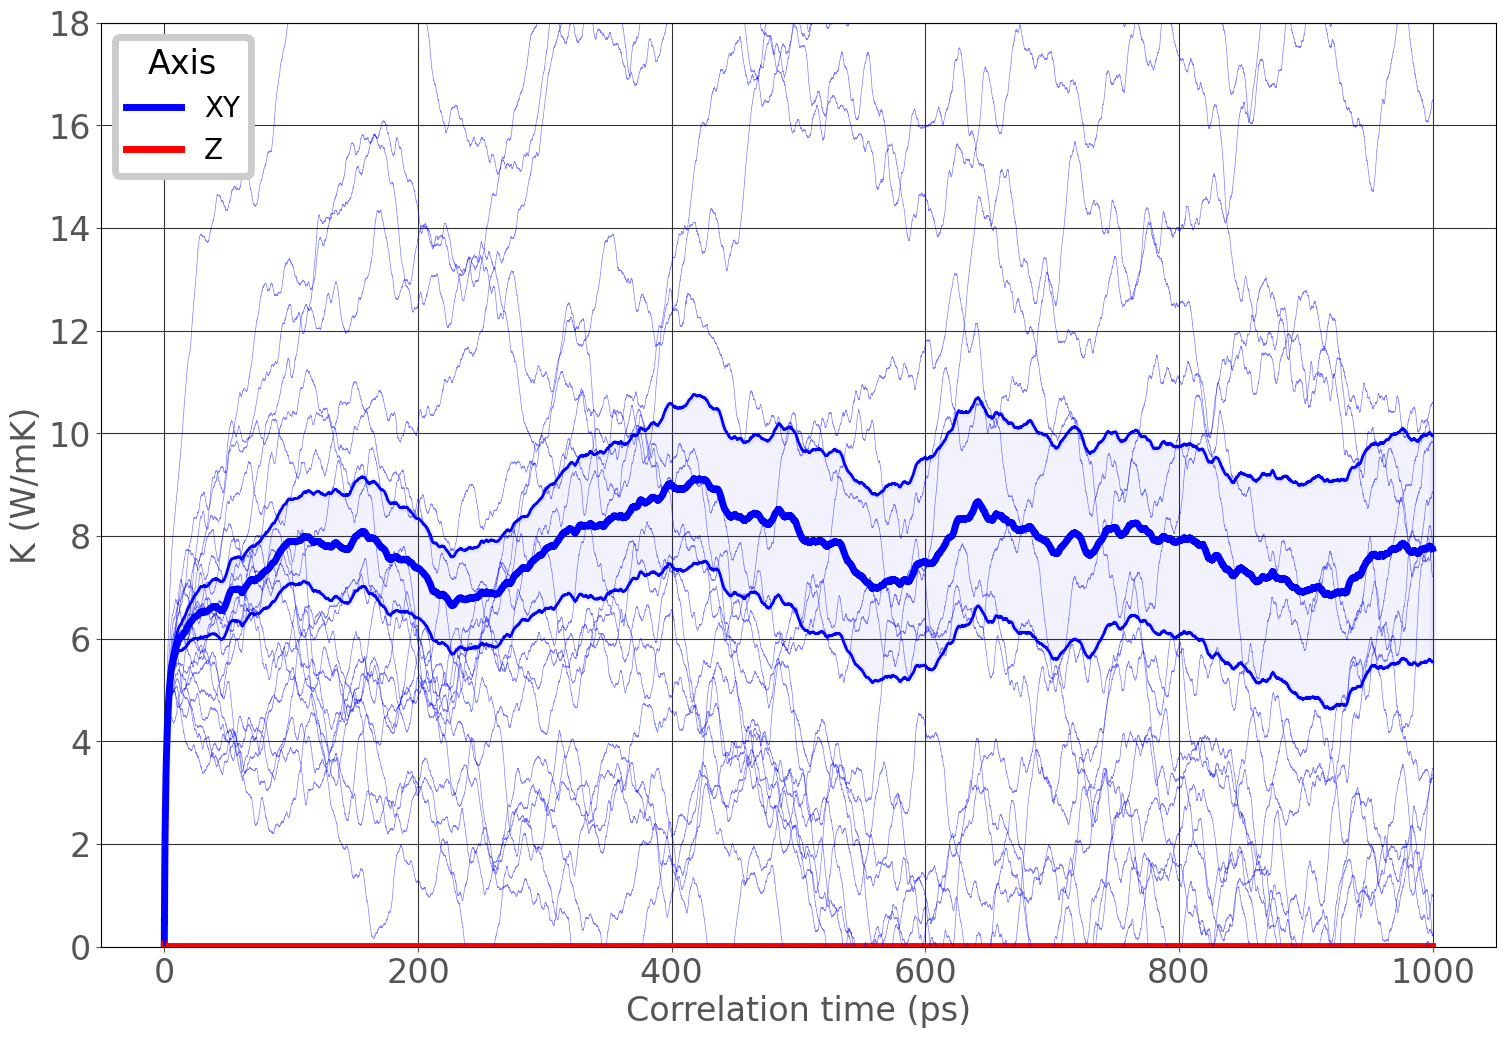

In [2]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

colorxy = 'b'
colorz = 'r'
model = np.load(prefix+'/gk_ml-2000.npy')


nps = 1000
tau = model['tau'][0, :nps*100:2]
std = model['std'][0, :nps*100:2, :] / np.sqrt(2*10) #[tau, (xy+z)]
mean = model['mean'][0, :nps*100:2, :] #[tau, (xy+z)]
kappas = model['kappa'][0, :nps*100:2, :, :] #[tau, (x+y+z), nrun]
nruns = kappas.shape[2]
print('Shapes\ntau:',tau.shape, '\t\tstd:',std.shape, '\nmean:', mean.shape, '\tkappas:', kappas.shape)

xyp = mean[:, 0] + std[:,0]
xym = mean[:, 0] - std[:,0]

ax.plot(tau, mean[:, 0], color=colorxy, alpha=1, linewidth=5, label='XY')
ax.plot(tau, mean[:, 1], color=colorz, alpha=1, linewidth=5, label='Z')
for ir in range(nruns):
    ax.plot(tau, kappas[:, :2, ir], color=colorxy, alpha=0.5, linewidth=0.5)
    ax.plot(tau, kappas[:, 2, ir], color=colorz, alpha=0.5, linewidth=0.5)

ax.plot(tau, xyp, color=colorxy, alpha=1, linewidth=2)
ax.plot(tau, xym, color=colorxy, alpha=1, linewidth=2)
ax.fill_between(tau, xym, xyp, color=colorxy, alpha=0.05)

ax.grid(color='k', alpha=0.8)
ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_ylim([0,18])
#ax.set_title(f'GK Integration Silicene: {model["name"][0].decode("UTF-8").upper()} atoms')

In [ ]:
print([d.shape for d in [model['tau'], model['kappa'], model['mean'], model['std']]])

In [ ]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

colorxy = 'b'
colorz = 'r'
model = np.load(prefix+'/gk_ml-2000.npy')


nps = 200
tau = model['tau'][0, :nps*100:2]
std = model['std'][0, :nps*100:2, :] / np.sqrt(2*10) #[tau, (xy+z)]
mean = model['mean'][0, :nps*100:2, :] #[tau, (xy+z)]
kappas = model['kappa'][0, :nps*100:2, :, :] #[tau, (x+y+z), nrun]
nruns = kappas.shape[2]
print('Shapes\ntau:',tau.shape, '\t\tstd:',std.shape, '\nmean:', mean.shape, '\tkappas:', kappas.shape)

xyp = mean[:, 0] + std[:,0]
xym = mean[:, 0] - std[:,0]

ax.plot(tau, mean[:, 0], color=colorxy, alpha=1, linewidth=5, label='XY')
ax.plot(tau, mean[:, 1], color=colorz, alpha=1, linewidth=5, label='Z')
for ir in range(nruns):
    ax.plot(tau, kappas[:, :2, ir], color=colorxy, alpha=0.5, linewidth=0.5)
    ax.plot(tau, kappas[:, 2, ir], color=colorz, alpha=0.5, linewidth=0.5)

ax.plot(tau, xyp, color=colorxy, alpha=1, linewidth=2)
ax.plot(tau, xym, color=colorxy, alpha=1, linewidth=2)
ax.fill_between(tau, xym, xyp, color=colorxy, alpha=0.05)

ax.grid(color='k', alpha=0.8)
ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_ylim([0,18])
#ax.set_title(f'GK Integration Silicene: {model["name"][0].decode("UTF-8").upper()} atoms')

In [ ]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

colorx = 'b'
colory = 'r'
model = np.load(prefix+'/gk_ml-2000.npy')


nps = 100
tau = model['tau'][0, :nps*100:2]
#std = model['std'][0, :nps*100:2, :] #[tau, (xy+z)]
#mean = model['mean'][0, :nps*100:2, :] #[tau, (xy+z)]
kappas = model['kappa'][0, :nps*100:2, :, :] #[tau, (x+y+z), nrun]
nruns = kappas.shape[2]
print('Shapes\ntau:',tau.shape, '\tkappas:', kappas.shape)

for ir in range(nruns):
    ax.plot(tau, kappas[:, 0, ir], color=colorx, alpha=0.5, linewidth=2,)
    ax.plot(tau, kappas[:, 1, ir], color=colory, alpha=0.5, linewidth=2,)


line1 = plt.Line2D([],[],color=colorx, lw=8)
line2 = plt.Line2D([],[],color=colory, lw=8)
lines = [line1, line2]
labels = ['X','Y']
ax.legend(lines, labels, loc='upper left', title='Axis')

ax.grid(color='k', alpha=0.8)
#ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_title(f'GK Integration Silicene: {model["name"][0].decode("UTF-8").upper()} atoms')
ax.set_ylim([0,18])

In [ ]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

colorxy = 'g'
colorz = 'orange'
model = np.load(prefix+'/he_ml-2000.npy')


nps = 100
tau = model['tau'][0, :nps*100:2]
std = model['std'][0, :nps*100:2, :] #[tau, (xy+z)]
mean = model['mean'][0, :nps*100:2, :] #[tau, (xy+z)]
kappas = model['kappa'][0, :nps*100:2, :, :] #[tau, (x+y+z), nrun]
nruns = kappas.shape[2]
print('Shapes\ntau:',tau.shape, '\t\tstd:',std.shape, '\nmean:', mean.shape, '\tkappas:', kappas.shape)

xyp = mean[:, 0] + std[:,0]
xym = mean[:, 0] - std[:,0]

ax.plot(tau, mean[:, 0], color=colorxy, alpha=1, linewidth=5, label='XY')
ax.plot(tau, mean[:, 1], color=colorz, alpha=1, linewidth=5, label='Z')
for ir in range(nruns):
    ax.plot(tau, kappas[:, :2, ir], color=colorxy, alpha=0.5, linewidth=0.5)
    ax.plot(tau, kappas[:, 2, ir], color=colorz, alpha=0.5, linewidth=0.5)

ax.plot(tau, xyp, color=colorxy, alpha=1, linewidth=2)
ax.plot(tau, xym, color=colorxy, alpha=1, linewidth=2)
ax.fill_between(tau, xym, xyp, color=colorxy, alpha=0.05)


ax.grid(color='k', alpha=0.8)
ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_title(f'HE Integration Silicene: {model["name"][0].decode("UTF-8").upper()} atoms')
ax.set_ylim([0,18])

In [ ]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

colorxy = 'g'
colorz = 'orange'
model = np.load(prefix+'/he_ml-2000.npy')


nps = 1000
tau = model['tau'][0, :nps*100:2]
std = model['std'][0, :nps*100:2, :] #[tau, (xy+z)]
mean = model['mean'][0, :nps*100:2, :] #[tau, (xy+z)]
kappas = model['kappa'][0, :nps*100:2, :, :] #[tau, (x+y+z), nrun]
nruns = kappas.shape[2]
print('Shapes\ntau:',tau.shape, '\t\tstd:',std.shape, '\nmean:', mean.shape, '\tkappas:', kappas.shape)

xyp = mean[:, 0] + std[:,0]
xym = mean[:, 0] - std[:,0]

ax.plot(tau, mean[:, 0], color=colorxy, alpha=1, linewidth=5, label='XY')
ax.plot(tau, mean[:, 1], color=colorz, alpha=1, linewidth=5, label='Z')
for ir in range(nruns):
    ax.plot(tau, kappas[:, :2, ir], color=colorxy, alpha=0.5, linewidth=0.5)
    ax.plot(tau, kappas[:, 2, ir], color=colorz, alpha=0.5, linewidth=0.5)

ax.plot(tau, xyp, color=colorxy, alpha=1, linewidth=2)
ax.plot(tau, xym, color=colorxy, alpha=1, linewidth=2)
ax.fill_between(tau, xym, xyp, color=colorxy, alpha=0.05)


ax.grid(color='k', alpha=0.8)
ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_title(f'HE Integration Silicene: {model["name"][0].decode("UTF-8").upper()} atoms')
ax.set_ylim([0,18])

400.0 [7.17526820e+00 3.94582156e-03] [5.03408778e-01 3.13719358e-06]
400.0 [6.37700129e+00 3.94892756e-03] [4.42137054e-01 3.19628930e-06]
400.0 [6.34913425e+00 3.95795964e-03] [4.93000502e-01 2.57741431e-06]
400.0 [7.02842016e+00 3.95889483e-03] [3.57592924e-01 4.15949858e-06]


(0.0, 600.0)

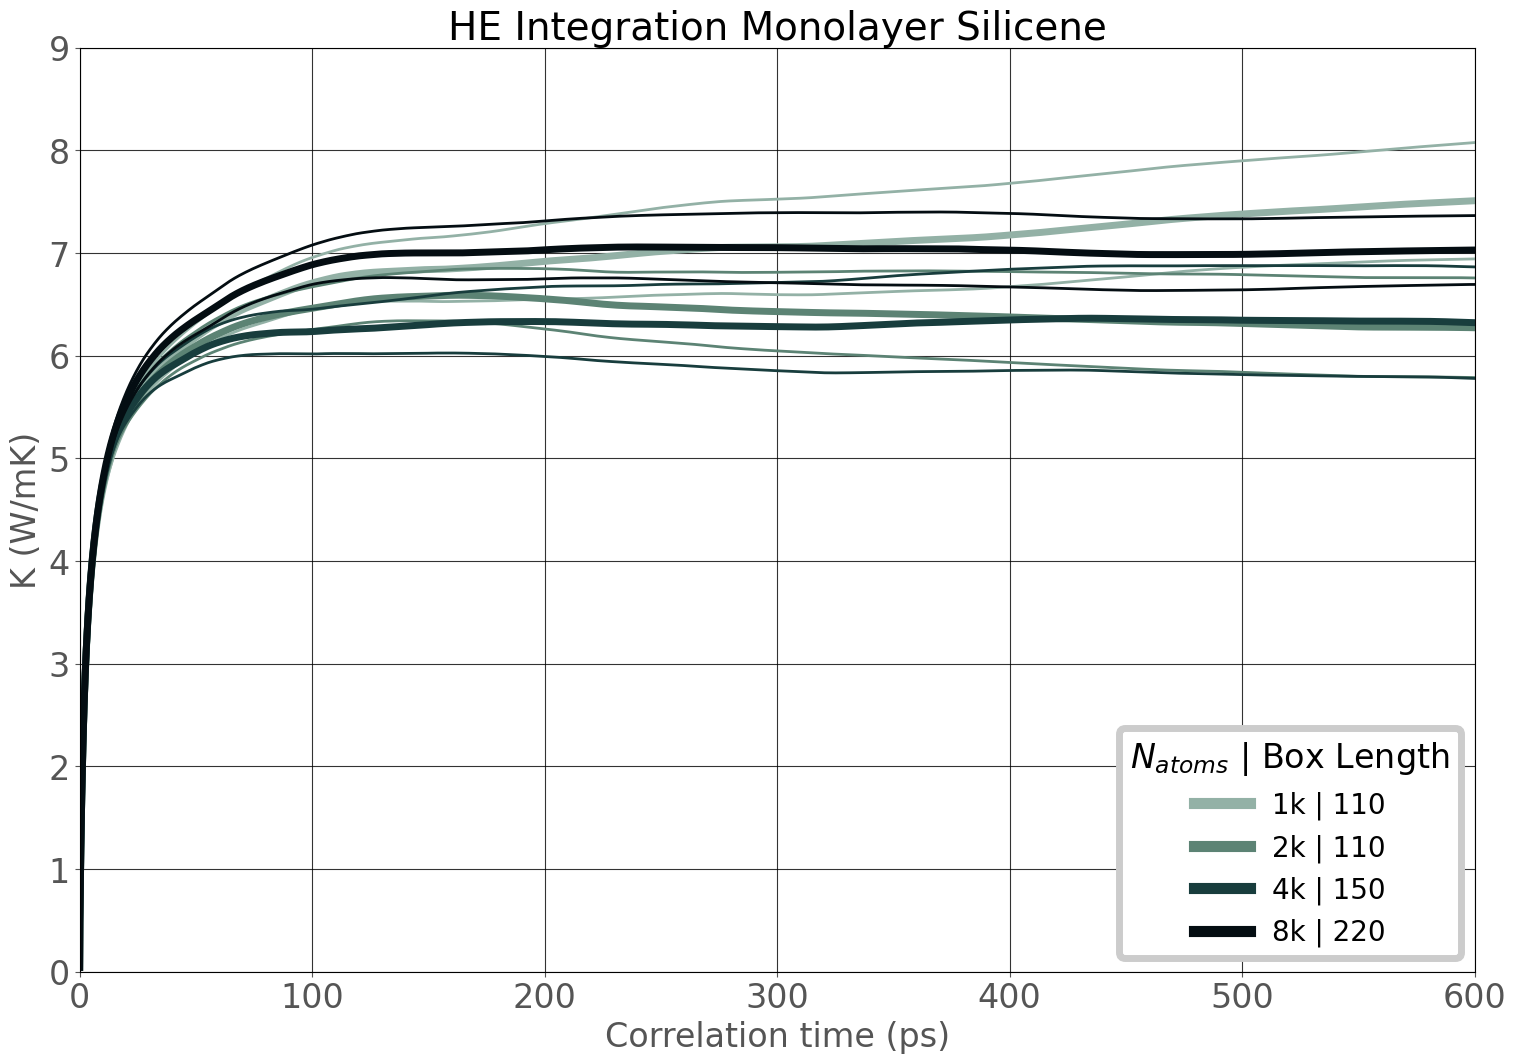

In [14]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

color1k = bluepalette[0]
color2k = bluepalette[1]
color4k = bluepalette[2]
onek = np.load(prefix+'/he_ml-1000.npy')
twok = np.load(prefix+'/he_ml-2000.npy')
fourk = np.load(prefix+'/he_ml-4000.npy')
eightk = np.load(prefix+'/he_ml-8000.npy')


nps = 1000
for color,model in zip(bluepalette, [onek, twok, fourk, eightk]):        
    tau = model['tau'][0, :nps*100:2]
    std = model['std'][0, :nps*100:2, :] #[tau, (xy+z)]
    mean = model['mean'][0, :nps*100:2, :] #[tau, (xy+z)]
    plus = mean[:, 0] + std[:,0]
    minus = mean[:, 0] - std[:,0]

    ax.plot(tau, mean[:, 0], color=color, alpha=1, linewidth=5)
    ax.plot(tau, plus, color=color, alpha=1, linewidth=2)
    ax.plot(tau, minus, color=color, alpha=1, linewidth=2)
    print(tau[4000], mean[4000], std[4000])

line1 = plt.Line2D([],[],color=bluepalette[0], lw=8)
line2 = plt.Line2D([],[],color=bluepalette[1], lw=8)
line3 = plt.Line2D([],[],color=bluepalette[2], lw=8)
line4 = plt.Line2D([],[],color=bluepalette[3], lw=8)
lines = [line1, line2, line3, line4]
labels = ['1k | 110', '2k | 110', '4k | 150', '8k | 220']
ax.legend(lines, labels, loc='lower right', title=r'$N_{atoms}$ | Box Length')
    
ax.grid(color='k', alpha=0.8)
#ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_title(f'HE Integration Monolayer Silicene')
ax.set_ylim([0,9])
ax.set_xlim([0,600])

(0.0, 2.0)

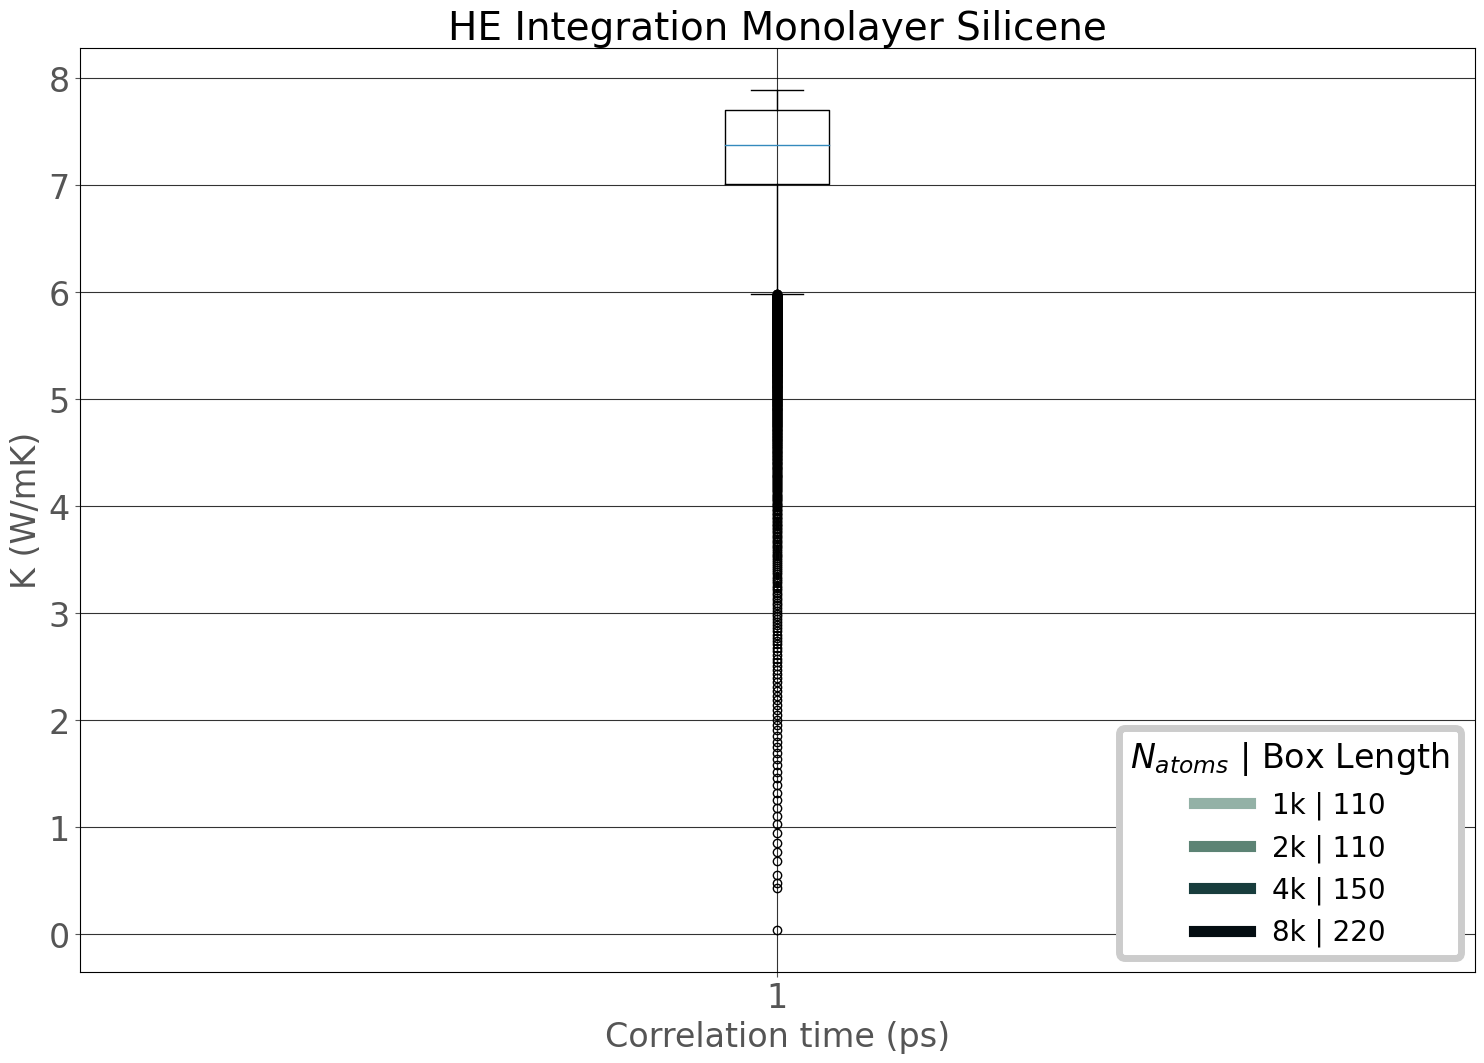

In [21]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

# onek= np.array([7.17526820e+00, 5.03408778e-01])
# twok= np.array([6.37700129e+00, 4.42137054e-01])
# fourk= np.array([6.34913425e+00, 4.93000502e-01])
# eightk = np.array([7.02842016e+00, 3.57592924e-01])
onek = np.load(prefix+'/he_ml-1000.npy')
twok = np.load(prefix+'/he_ml-2000.npy')
fourk = np.load(prefix+'/he_ml-4000.npy')
eightk = np.load(prefix+'/he_ml-8000.npy')

ax.boxplot(onek['mean'][0,:,0], notch=0,)

line1 = plt.Line2D([],[],color=bluepalette[0], lw=8)
line2 = plt.Line2D([],[],color=bluepalette[1], lw=8)
line3 = plt.Line2D([],[],color=bluepalette[2], lw=8)
line4 = plt.Line2D([],[],color=bluepalette[3], lw=8)
lines = [line1, line2, line3, line4]
labels = ['1k | 110', '2k | 110', '4k | 150', '8k | 220']
ax.legend(lines, labels, loc='lower right', title=r'$N_{atoms}$ | Box Length')
    
ax.grid(color='k', alpha=0.8)
#ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_title(f'HE Integration Monolayer Silicene')
ax.set_xlim([0,2])
#ax.set_xlim([0,600])

Text(0.5, 1.0, 'HE Integration Monolayer Silicene')

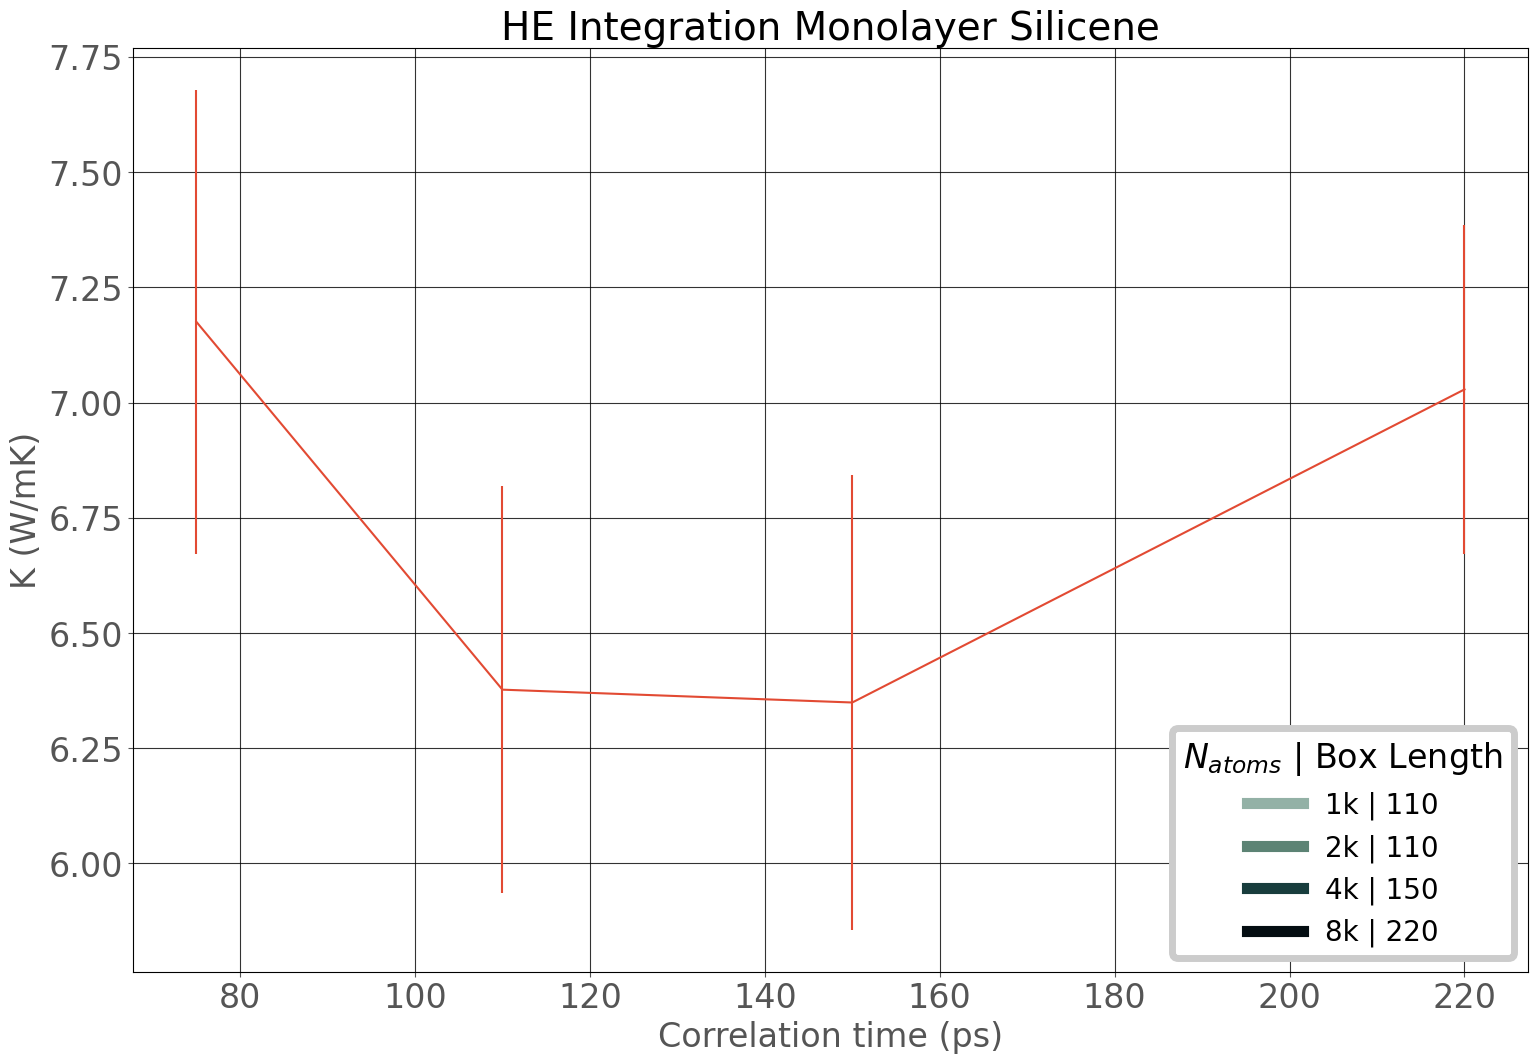

In [23]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

# onek= np.array([7.17526820e+00, 5.03408778e-01])
# twok= np.array([6.37700129e+00, 4.42137054e-01])
# fourk= np.array([6.34913425e+00, 4.93000502e-01])
# eightk = np.array([7.02842016e+00, 3.57592924e-01])
x=[75, 110, 150, 220]
y=[7.17526820e+00, 6.37700129e+00, 6.34913425e+00, 7.02842016e+00,]
s=[5.03408778e-01, 4.42137054e-01, 4.93000502e-01, 3.57592924e-01]

ax.errorbar(x,y,yerr=s)

line1 = plt.Line2D([],[],color=bluepalette[0], lw=8)
line2 = plt.Line2D([],[],color=bluepalette[1], lw=8)
line3 = plt.Line2D([],[],color=bluepalette[2], lw=8)
line4 = plt.Line2D([],[],color=bluepalette[3], lw=8)
lines = [line1, line2, line3, line4]
labels = ['1k | 110', '2k | 110', '4k | 150', '8k | 220']
ax.legend(lines, labels, loc='lower right', title=r'$N_{atoms}$ | Box Length')
    
ax.grid(color='k', alpha=0.8)
#ax.legend(loc='upper left', title='Axis')
ax.set_xlabel('Correlation time (ps)')
ax.set_ylabel('K (W/mK)')
ax.set_title(f'HE Integration Monolayer Silicene')